# Introduction to Data Science – Homework 6
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 01 2024, 11:59pm.

In Part 1 of this homework you will scrape github repositories and organize the information in a Pandas dataframe. In Part 2, you will use linear regression to gain meaningful insights. 

## Your Data
First Name: Noble
<br>
Last Name: Ledbetter
<br>
E-mail: U0967666@utah.edu
<br>
UID: U0967666
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
# you can use either of these libraries to get html from a website
import time
import os

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 
# where the data is stored
DATA_PATH = "data"

### 1. Scrape Github Repository List using BeautifulSoup
In this part you will explore Github repositories, specifically the 100 most-starred repositories. You are going to scrape data from a snapshot of [this repository list](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories).

### 1.1. Check whether you are permitted to scrape the data
Before you start to scrape any website you should go through the terms of service and policy documents of the website. Almost all websites post conditions to use their data. Check the terms of [https://github.com/](https://github.com/) (see the tiny "terms" link at the bottom of the page) to see whether the site permits you to scrape their data or not. Are you sure you are allowed to scrape?

**Your solution:**
We are allowed to do data scraping, however we cannot be excessive, share API tokens, or monetize our data scraping.

### Task 1.2 Load the Data

To avoid any problems with GitHub blocking us from downloading the data many times, we have downloaded and saved a snapshot of the html files for you in the [data](data) folder. Note that the data folder is not completely consistent with what you see on the web – we've made a few patches to the data that makes your task here easier and this data represents a snapshot in time. You will be treating the data folder as your website to be scraped. The path to data folder is stored in `DATA_PATH` variable.

In the data folder you will find first 10 pages of highly starred repositories saved as `searchPage1.html`,`searchPage2.html`,`searchPage3.html` ... `searchPage10.html`

Check out page 10 if you want to see what happens if you scrape too quickly 😉. 

Now read these html files in python and create a soup object. This is a two step process:
 * Read the text in the html files
 * Create the soup from the files that you've read. 

[<!DOCTYPE html>
 
 <html lang="en">
 <head>
 <meta charset="utf-8"/>
 <link href="https://github.githubassets.com" rel="dns-prefetch"/>
 <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
 <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
 <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
 <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
 <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
 <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
 <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-6548d5a1dd84bd83036c6a914b25b4ae.css" integrity="sha512-ZUjVod2EvYMDbGqRSyW0rpfgBq3i+gnR/4PfrzLsy5f20oIcRfgFQFVKgi3Ztp917bP1K/kdP5q8+nAlJ3+cFA==" media="all" rel="stylesheet"/>
 <link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-1cd57b56e5c8f7c49216299a13bafc79.css" integrity="sha512-HNV7VuXI98SSFim
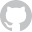
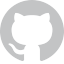

In [2]:
def get_html_pages():
    pages=[]
    for i in range(1,11):
        pages.append(BeautifulSoup(open('data/searchPage' + str(i) + '.html',encoding='utf8'),'html.parser'))
        pages[i-1].prettify()
    return pages
stars = get_html_pages()
stars

# page1 = BeautifulSoup(open('data/searchPage1.html',encoding='utf8'),'html.parser')
# page2 = BeautifulSoup(open('data/searchPage2.html',encoding='utf8'),'html.parser')
# page3 = BeautifulSoup(open('data/searchPage3.html',encoding='utf8'),'html.parser')
# page4 = BeautifulSoup(open('data/searchPage4.html',encoding='utf8'),'html.parser')
# page5 = BeautifulSoup(open('data/searchPage5.html',encoding='utf8'),'html.parser')
# page6 = BeautifulSoup(open('data/searchPage6.html',encoding='utf8'),'html.parser')
# page7 = BeautifulSoup(open('data/searchPage7.html',encoding='utf8'),'html.parser')
# page8 = BeautifulSoup(open('data/searchPage8.html',encoding='utf8'),'html.parser')
# page9 = BeautifulSoup(open('data/searchPage9.html',encoding='utf8'),'html.parser')
# page10 = BeautifulSoup(open('data/searchPage10.html',encoding='utf8'),'html.parser')


### Extracting Data

Extract the following data for each repository, and create a Pandas Dataframe with a row for each repository and a column for each of these datums. 

+ The name of the repository
+ The primary language (there are multiple or none, if multiple, use the first one, if none, use "none")
+ The number of watches
+ The number of stars
+ The number of forks
+ The number of issues
+ Number of commits
+ Number of contributors
+ Number of pull requests, and
+ Number of top level folders in the file list.

Here's an example for one repository, `jackfrued/Python-100-Days,` in our dataset: 
```python
{'name': 'Python-100-Days',
'language': 'Jupyter Notebook',
'watches': '4822',
'stars': '78068',
'forks': '30979',
'issues': 224,
'commits': 296,
'contributors': 12,
'pull_requests':85,
'folders': 14
}
```

### Task 1.3 Extract repository URLs

If you look at the results of the 100 most-starred repositories [(this list)](https://github.com/search?o=desc&q=stars%3A%3E1&s=stars&type=Repositories), you will notice that all the information we want to extract for each repository is not in that list. This information is in the repository’s individual web page, for example [996icu](https://github.com/996icu/996.ICU). 

Therefore, you will first have to extract links of each repository from the soup you scraped earlier. When you extract the link for the repository, it will be a path to the stored HTML page for the repository. You will use this path to read the file and extract the above information.

Refer to the scraping lecture for details on how to do this. We recommend you use the web inspector to identify the relevant structures.

Example of a link that you need to extract - 996icu/996.ICU.html

In [3]:
### want these
# df_stars = pd.DataFrame({
#     'name': , ***
#     'language': , ***
#     'watches': , ***
#     'stars': , ***
#     'forks': , ***
#     'issues': , ***
#     'commits': ,
#     'contributors': ,
#     'pull_requests':, ***
#     'folders': 
# })


######### notes for first part
# # using a function
# def find_href(html_file):
#     for match in html_file.select('a.v-align-middle'):
#         href = match.get("href")
#     return href

# urls=[]
# for i in range(len(stars)):
#     urls.append(find_href(stars[i]))
# urls

# lll = []
# for file in range(len(stars))
#     lll.append(find_href(file))
##########


#### works for 1 href
# stars[0].select('a.v-align-middle')
# sshref = sss.get("href")
# sshref

#### works for a group of hrefs
# sshref=[]
# for sss in stars[0].select('a.v-align-middle'):
# #     sshref = sss.get("href")
#     sshref.append(sss.get("href"))
# sshref


####### finished function
# def find_href(html_file):
#     href_folder=[]
#     for i in range(len(html_file)):
#         for sss in html_file[i].select('a.v-align-middle'):
#             href_folder.append(sss.get("href"))
#     return href_folder

# stars_href=find_href(stars)
# stars_href



######### works for a group of hrefs to get htmls
# folders=[]
# for i in range(len(stars_href)):
#     folders.append(BeautifulSoup(open('data/'+stars_href[i],encoding='utf8'),'html.parser'))
#     folders[i].prettify()
# folders[3]


##### finished function
# def get_html_from_href(href):
#     html=[]
#     for i in range(len(href)):
#         html.append(BeautifulSoup(open('data/'+href[i],encoding='utf8'),'html.parser'))
#         html[i].prettify()
#     return html

# htmls=get_html_from_href(stars_href)
# htmls[0]




#######

#def find_all_the_propertise(file_name)
    # create a dicitonary here
    #call find_name(file_name)
    #store the name on that dictionalry using a key-value pair
    #call find_language(file_name)
    #call find_watches(file_name)
    #...
    

# def find_all_the_properties(file_name)
#     dicts = {}
#     dicts['name'] = find_name(file_name)
#     return dicts

# find_all_the_properties()

# listss = []
# # for all of thsoe files
#     listss.append(find_all_the_properties(filename))
    
               
               
  ### basic version that will get us in the right direction  
# #using for loop
# for i in range(len(stars)):
#     for subject in stars[i].select('a.v-align-middle'):
#         # get the link out of the href attribute
#         urls.append(subject.get("href"))
# urls
               
               
               
               
####### make small functions that get name, lang etc. put those small functions in a big function that puts them all in a dictionary.finish the dictionary fuction by putting the dictionary into a dataframe.

In [4]:
# get hyperlink reference
def find_href(html_file):
    href_folder=[]
    for i in range(len(html_file)):
        for link in html_file[i].select('a.v-align-middle'):
            href_folder.append(link.get("href"))
    return href_folder


stars_href=find_href(stars)
stars_href


['freeCodeCamp/freeCodeCamp.html',
 '996icu/996.ICU.html',
 'vuejs/vue.html',
 'facebook/react.html',
 'tensorflow/tensorflow.html',
 'twbs/bootstrap.html',
 'EbookFoundation/free-programming-books.html',
 'sindresorhus/awesome.html',
 'getify/You-Dont-Know-JS.html',
 'ohmyzsh/ohmyzsh.html',
 'jwasham/coding-interview-university.html',
 'kamranahmedse/developer-roadmap.html',
 'github/gitignore.html',
 'airbnb/javascript.html',
 'microsoft/vscode.html',
 'CyC2018/CS-Notes.html',
 'd3/d3.html',
 'flutter/flutter.html',
 'torvalds/linux.html',
 'facebook/react-native.html',
 'donnemartin/system-design-primer.html',
 'electron/electron.html',
 'vinta/awesome-python.html',
 'jackfrued/Python-100-Days.html',
 'facebook/create-react-app.html',
 'public-apis/public-apis.html',
 'axios/axios.html',
 'golang/go.html',
 'Snailclimb/JavaGuide.html',
 'jlevy/the-art-of-command-line.html',
 'nodejs/node.html',
 'TheAlgorithms/Python.html',
 'daneden/animate.css.html',
 'kubernetes/kubernetes.html',

In [5]:
def get_html_from_href(href):
    html=[]
    for i in range(len(href)):
        html.append(BeautifulSoup(open('data/'+href[i],encoding='utf8'),'html.parser'))
        html[i].prettify()
    return html

htmls=get_html_from_href(stars_href)
htmls[0]


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-6548d5a1dd84bd83036c6a914b25b4ae.css" integrity="sha512-ZUjVod2EvYMDbGqRSyW0rpfgBq3i+gnR/4PfrzLsy5f20oIcRfgFQFVKgi3Ztp917bP1K/kdP5q8+nAlJ3+cFA==" media="all" rel="stylesheet">
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/site-1cd57b56e5c8f7c49216299a13bafc79.css" integrity="sha512-HNV7VuXI98SSFimaE7r8eVsgrmzC3

In [6]:
######## goal   
#def find_name(html_file):
    #find the name here
    #return it
    
def find_title(html):
    titles=[]
    for i in range(len(html)):
        titles.append(html[i].find(itemprop='name').get_text())
        titles[i]=titles[i].strip('\n')
    return titles

name=find_title(htmls)
name
    

['freeCodeCamp',
 '996.ICU',
 'vue',
 'react',
 'tensorflow',
 'bootstrap',
 'free-programming-books',
 'awesome',
 'You-Dont-Know-JS',
 'ohmyzsh',
 'coding-interview-university',
 'developer-roadmap',
 'gitignore',
 'javascript',
 'vscode',
 'CS-Notes',
 'd3',
 'flutter',
 'linux',
 'react-native',
 'system-design-primer',
 'electron',
 'awesome-python',
 'Python-100-Days',
 'create-react-app',
 'public-apis',
 'axios',
 'go',
 'JavaGuide',
 'the-art-of-command-line',
 'node',
 'Python',
 'animate.css',
 'kubernetes',
 'free-programming-books-zh_CN',
 'Font-Awesome',
 'javascript-algorithms',
 'models',
 'youtube-dl',
 'build-your-own-x',
 'angular.js',
 'puppeteer',
 'three.js',
 'TypeScript',
 'angular',
 'terminal',
 'laravel',
 'moby',
 'ant-design',
 'java-design-patterns',
 'computer-science',
 '30-seconds-of-code',
 'material-ui',
 'jquery',
 'webpack',
 'redux',
 'thefuck',
 'awesome-vue',
 'awesome-go',
 'atom',
 'swift',
 'reveal.js',
 'LeetCodeAnimation',
 'vue-element-admi

In [7]:
# goal find language in html file

#def find_langauge(html_file):
    #find language
    #return it

#### works for 1
# langs=[]
# langs.append(htmls[0].find(class_='language-color').get_text())
# langs

def find_code_langs(html):
    langs_g=[]
    for i in range(len(html)):
        langs = html[i].find_all(class_='language-color')
        for ii in range(len(langs)):
            if langs[ii]!=None:
                langs[ii]=langs[ii].get_text()
            else:
                langs[ii]='None'

        # make a filter for langs group so that it doesn't keep blank spaces (aka '')
        filter=[x for x in langs if x]

        # append list of langs for the page into langs group
        langs_g.append(filter)
    return langs_g

language=find_code_langs(htmls)
language


[['JavaScript', 'CSS', 'HTML'],
 ['Rust', 'Go', 'Python', 'Makefile'],
 ['JavaScript', 'Other'],
 ['JavaScript', 'HTML', 'CSS', 'C++', 'TypeScript', 'CoffeeScript', 'Other'],
 ['C++', 'Python', 'HTML', 'Starlark', 'Go', 'MLIR', 'Other'],
 ['JavaScript', 'CSS', 'HTML', 'Other'],
 [],
 [],
 [],
 ['Shell', 'Other'],
 [],
 [],
 [],
 ['JavaScript'],
 ['TypeScript', 'JavaScript', 'CSS', 'Inno Setup', 'HTML', 'Shell'],
 ['Java'],
 ['JavaScript'],
 ['Dart', 'Java', 'Objective-C', 'Shell', 'Ruby', 'Batchfile'],
 ['C', 'C++', 'Assembly', 'Objective-C', 'Makefile', 'Shell', 'Other'],
 ['JavaScript',
  'Java',
  'C++',
  'Objective-C',
  'Objective-C++',
  'Starlark',
  'Other'],
 ['Python', 'Shell'],
 ['C++',
  'TypeScript',
  'JavaScript',
  'Objective-C++',
  'HTML',
  'Python',
  'Other'],
 ['Python', 'Makefile'],
 ['Jupyter Notebook', 'HTML', 'Python', 'JavaScript', 'CSS', 'TSQL', 'Java'],
 ['JavaScript', 'Shell', 'Other'],
 ['Python', 'Shell'],
 ['JavaScript', 'TypeScript', 'HTML'],
 ['Go', 

In [8]:
# goal find watches, starred, and forked (aka social count)

# # works for 1
# watches=[]
# starred=[]
# forked=[]
# soc_ct_temp=[]
# soc_ct_temp.append(htmls[0].select('a.social-count'))
# print(soc_ct_temp)
# fork=soc_ct_temp[0][2].get_text()
# fork_stripped=fork.strip('\n k')
# print(float(fork_stripped)*1000)

# # works for group
# watches=[]
# starred=[]
# forked=[]
# for i in range(len(htmls)):
#     soc_ct_temp=[]
#     soc_ct_temp.append(htmls[i].select('a.social-count'))
#     print(soc_ct_temp)
#     for ii in range(len(soc_ct_temp[0])):
#         if ii==0:
#             watches.append(soc_ct_temp[0][ii].get_text())
#             watches[i]=float(watches[i].strip('\n k'))*1000
#         if ii==1:
#             starred.append(soc_ct_temp[0][ii].get_text())
#             starred[i]=float(starred[i].strip('\n k'))*1000
#         if ii==2:
#             forked.append(soc_ct_temp[0][ii].get_text())
#             forked[i]=float(forked[i].strip('\n k'))*1000
#     print(watches)
#     print(starred)
#     print(forked)

    
# working function
def find_watches_starred_forked(html):
    watches=[]
    starred=[]
    forked=[]
    for i in range(len(htmls)):
        soc_ct_temp=[]
        soc_ct_temp.append(htmls[i].select('a.social-count'))
        for ii in range(len(soc_ct_temp[0])):
            if ii==0:
                watches.append(soc_ct_temp[0][ii].get_text())
                watches[i]=float(watches[i].strip('\n k'))*1000
            if ii==1:
                starred.append(soc_ct_temp[0][ii].get_text())
                starred[i]=float(starred[i].strip('\n k'))*1000
            if ii==2:
                forked.append(soc_ct_temp[0][ii].get_text())
                forked[i]=float(forked[i].strip('\n k'))*1000       
    return watches, starred, forked

w,s,f = find_watches_starred_forked(htmls)  

print(w)
print(s)
print(f)



[8400.0, 4500.0, 6000.0, 6600.0, 8500.0, 7200.0, 8600.0, 6600.0, 5400.0, 2600.0, 5300.0, 5300.0, 3000.0, 3500.0, 2900.0, 4500.0, 4000.0, 2700.0, 6900.0, 3700.0, 4400.0, 2800.0, 5200.0, 4800.0, 1800.0, 2100.0, 1200.0, 3400.0, 3600.0, 2200.0, 2900.0, 3300.0, 2400.0, 3100.0, 5400.0, 1400.0, 2500.0, 3000.0, 1800.0, 2300.0, 4100.0, 1200.0, 2500.0, 2100.0, 3200.0, 1200.0, 4600.0, 3200.0, 1500.0, 3900.0, 3400.0, 1700.0, 1300.0, 3400.0, 1600.0, 1500.0, 826000.0, 2200.0, 2600.0, 2500.0, 2500.0, 1600.0, 2300.0, 1900.0, 2300.0, 1700.0, 1800.0, 1400.0, 2600.0, 1400.0, 2200.0, 2800.0, 2100.0, 1100.0, 693000.0, 973000.0, 1300.0, 3400.0, 2600.0, 846000.0, 1400.0, 720000.0, 1500.0, 2600.0, 1400.0, 1000.0, 2400.0, 336000.0, 3300.0, 871000.0]
[309000.0, 249000.0, 157000.0, 144000.0, 141000.0, 139000.0, 137000.0, 126000.0, 117000.0, 103000.0, 97800.0, 95700.0, 95200.0, 92600.0, 91500.0, 90800.0, 89900.0, 86700.0, 86500.0, 84900.0, 82700.0, 80700.0, 79300.0, 78100.0, 76000.0, 70600.0, 69600.0, 69000.0, 68

In [9]:
# goal get issues and pull requests

### works for 1
# issues=[]
# pull_req=[]

# names=htmls[10](itemprop='name')
# names_condense=[names[i].get_text() for i in range(len(names))]
# names_filt=[]
# for name in names_condense:
#     if name=='Issues' or name=='Pull requests':
#         names_filt.append(name)

# cntr=htmls[10](class_='Counter')
# cntr_condense=[cntr[i].get_text() for i in range(len(cntr))]
# cntr_filt=cntr_condense[:len(names_filt)]

# print(names_condense)
# print(names_filt)
# print(cntr_condense)
# print(cntr_filt)

# # for i in range(len(names_filt)):
# if len(names_filt[i])>1:
#     issues.append(cntr_filt[0])
#     pull_req.append(cntr_filt[1])
# else:
#     pull_req.append(cntr_filt[0])
# print(issues)
# print(pull_req)
        
# name_and_count_dict={}
# for i in range(len(names_filt)):
#     print(i)
#     if names_filt[i]=='Issues':
#         name_and_count_dict['Issues']=cntr_filt[i]
#     elif names_filt[i]=='Pull requests':
#         name_and_count_dict['Pull requests']=cntr_filt[i]
# print(name_and_count_dict)



### works for group
# issues=[]
# pull_req=[]
# for i in range(len(htmls)):
#     names=htmls[i](itemprop='name')
#     names_condense=[names[i].get_text() for i in range(len(names))]
#     names_filt=[]
#     for name in names_condense:
#         if name=='Issues' or name=='Pull requests':
#             names_filt.append(name)

#     cntr=htmls[i](class_='Counter')
#     cntr_condense=[cntr[i].get_text() for i in range(len(cntr))]
#     cntr_filt=cntr_condense[:len(names_filt)]

#     if len(names_filt)>1:
#         issues.append(cntr_filt[0])
#         pull_req.append(cntr_filt[1])
#     else:
#         issues.append(0)
#         pull_req.append(cntr_filt[0])
# print(issues)
# print(pull_req)


# function
def find_issues_and_pull_req(html):
    issues=[]
    pull_req=[]
    for i in range(len(html)):
        names=html[i](itemprop='name')
        names_condense=[names[i].get_text() for i in range(len(names))]
        names_filt=[]
        for name in names_condense:
            if name=='Issues' or name=='Pull requests':
                names_filt.append(name)

        cntr=html[i](class_='Counter')
        cntr_condense=[cntr[i].get_text() for i in range(len(cntr))]
        cntr_filt=cntr_condense[:len(names_filt)]

        if len(names_filt)>1:
            issues.append(cntr_filt[0])
            pull_req.append(cntr_filt[1])
        else:
            issues.append(0)
            pull_req.append(cntr_filt[0])
    return issues, pull_req

i,p = find_issues_and_pull_req(htmls)
print(i)
print(p)

['163', 0, '291', '483', '3,102', '331', '19', '12', '76', '214', '26', '5', 0, '79', '4,475', '18', '3', '5,000+', 0, '721', '78', '1,261', '1', '224', '430', '5', '284', '5,000+', '21', '78', '910', '15', '30', '2,156', '135', '5,000+', '49', '1,023', '2,612', '42', '390', '803', '494', '4,082', '2,918', '846', 0, '3,627', '435', '156', '8', '3', '328', '70', '368', '28', '182', '86', '8', '485', 0, '457', '0', '549', '18', '449', '123', '867', '49', '367', 0, '2,176', '2,790', '135', '476', '448', '14', '423', '404', '272', '680', '222', '320', '2', '1,235', '246', '5', '29', '0', '35']
['89', '25', '152', '98', '245', '78', '16', '14', '38', '562', '22', '0', '116', '35', '145', '5', '1', '119', '322', '84', '59', '64', '43', '85', '108', '82', '147', '176', '1', '89', '262', '17', '11', '900', '0', '16', '126', '219', '565', '23', '75', '30', '106', '257', '535', '37', '0', '188', '28', '9', '1', '3', '17', '13', '79', '10', '33', '220', '19', '128', '428', '94', '1', '30', '3', '

In [10]:
# goal get commits and contributors 
### works for 1
# commits=[]
# contributors=[]
# contrib=htmls[1](class_='num')
# # for i in range(len(names)):
# #     names[i]=names[i].get_text()
# contrib_filt=[contrib[i].get_text() for i in range(len(contrib))]
# contrib_filt_strp=[contrib_filt[i].strip('\n ') for i in range(len(contrib_filt))]

# commits.append(contrib_filt_strp[0])
# contributors.append(contrib_filt_strp[4])

# print(contrib)
# print(contrib_filt)
# print(contrib_filt_strp)
# print(commits)
# print(contributors)


### works for group
# commits=[]
# contributors=[]
# for i in range(len(htmls)):
#     contrib=htmls[i](class_='num')
#     contrib_filt=[contrib[i].get_text() for i in range(len(contrib))]
#     contrib_filt_strp=[contrib_filt[i].strip('\n ') for i in range(len(contrib_filt))]

#     commits.append(contrib_filt_strp[0])
#     contributors.append(contrib_filt_strp[4])

# print(commits)
# print(contributors)

### function
def find_commits_and_contributors(html):
    commits=[]
    contributors=[]
    for i in range(len(html)):
        contrib=html[i](class_='num')
        contrib_filt=[contrib[i].get_text() for i in range(len(contrib))]
        contrib_filt_strp=[contrib_filt[i].strip('\n ') for i in range(len(contrib_filt))]

        commits.append(contrib_filt_strp[0])
        contributors.append(contrib_filt_strp[4])
    return commits,contributors

com,con=find_commits_and_contributors(htmls)
print(com)
print(con)

['25,355', '3,019', '3,085', '12,812', '78,840', '19,337', '5,200', '892', '1,654', '5,481', '1,318', '253', '3,207', '1,796', '61,145', '3,591', '4,209', '17,643', '900,539', '19,379', '280', '23,166', '1,430', '296', '2,493', '2,132', '905', '42,513', '2,063', '1,185', '29,600', '1,419', '456', '88,446', '901', '64', '790', '4,198', '17,560', '379', '8,978', '1,624', '31,921', '29,642', '17,027', '977', '6,139', '38,283', '17,316', '2,402', '754', '4,780', '11,067', '6,465', '10,470', '2,961', '1,555', '2,813', '3,328', '37,358', '101,825', '2,416', '87', '966', '3,837', '1,720', '5,558', '6,684', '1,345', '3,051', '27,917', '50,582', '5,342', '1,148', '24,957', '789', '354', '25,192', '75,943', '5,100', '9,816', '364', '2,786', '1,778', '4,368', '807', '786', '263', '1,368', '7,994']
['3,999', '605', '289', '1,361', '2,396', '1,108', '1,096', '439', '169', '1,498', '139', '22', '1,110', '429', '1,091', '207', '121', '534', '∞', '2,062', '75', '928', '325', '12', '787', '545', '199',

In [11]:
# goal find folders

### works for 1
# folders=[]
# fold=htmls[12](class_='octicon octicon-file-directory')
# folders.append(len(fold))
# print(fold)
# print(folders)

### works for group
# folders=[]
# for i in range(len(htmls)):
#     fold=htmls[i](class_='octicon octicon-file-directory')
#     folders.append(len(fold))
# print(fold)
# print(folders)

### function
def find_folders(html):
    folders=[]
    for i in range(len(htmls)):
        fold=htmls[i](class_='octicon octicon-file-directory')
        folders.append(len(fold))
    return folders

f=find_folders(htmls)
print(f)

[9, 8, 11, 6, 4, 8, 1, 2, 7, 9, 2, 3, 3, 4, 9, 4, 2, 5, 22, 22, 2, 17, 2, 14, 5, 2, 6, 7, 3, 1, 8, 34, 1, 17, 1, 11, 2, 4, 6, 0, 12, 7, 9, 9, 13, 9, 9, 35, 9, 129, 1, 10, 11, 5, 11, 8, 3, 0, 2, 15, 15, 6, 1, 7, 6, 5, 4, 6, 4, 6, 8, 18, 7, 4, 16, 4, 3, 10, 17, 8, 22, 6, 7, 5, 7, 5, 3, 4, 1, 3]


In [12]:
#goal combine all properties and create panda
#def find_all_the_properties(file_name)
    # create a dicitonary here
    #call find_name(file_name)
    #store the name on that dictionalry using a key-value pair
    #call find_language(file_name)
    #call find_watches(file_name)
    #...
    

# def find_all_the_properties(file_name)
#     dicts = {}
#     dicts['name'] = find_name(file_name)
#     return dicts

# find_all_the_properties()

def find_all_the_properties(file_name):
    html_dict={}
    file_href=find_href(file_name)
    file_html=get_html_from_href(file_href)
    html_dict['name']=find_title(file_html)
    html_dict['language']=find_code_langs(file_html)
    html_dict['watches'],html_dict['stars'],html_dict['forks']=find_watches_starred_forked(file_html)
    html_dict['issues'],html_dict['pull_requests']=find_issues_and_pull_req(file_html)
    html_dict['commits'],html_dict['contributors']=find_commits_and_contributors(file_html)
    html_dict['folders']=find_folders(file_html)
    html_panda=pd.DataFrame(html_dict)
    return html_panda
    
raw_prop=find_all_the_properties(stars)
raw_prop

name  \
0                              freeCodeCamp   
1                                   996.ICU   
2                                       vue   
3                                     react   
4                                tensorflow   
..                                      ...   
85                            markdown-here   
86  Front-end-Developer-Interview-Questions   
87                        resume.github.com   
88                 awesome-machine-learning   
89                                   lodash   

                                             language   watches     stars  \
0                             [JavaScript, CSS, HTML]    8400.0  309000.0   
1                        [Rust, Go, Python, Makefile]    4500.0  249000.0   
2                                 [JavaScript, Other]    6000.0  157000.0   
3   [JavaScript, HTML, CSS, C++, TypeScript, Coffe...    6600.0  144000.0   
4      [C++, Python, HTML, Starlark, Go, MLIR, Other]    8500.0  141000.0   
..                                                ...       ...       ...   
85                            [JavaScript, CSS, HTML]    1000.0   43800.0   
86                     [HTML, CSS, JavaScript, Shell]    2400.0   43600.0   
87                      [JavaScript, HTML, CSS, Ruby]  336000.0   43600.0   
88                                           [Python]    3300.0   43500.0   
89                                       [JavaScript]  871000.0   43500.0   

      forks issues pull_requests commits contributors  folders  
0   23700.0    163            89  25,355        3,999        9  
1   21200.0      0            25   3,019          605        8  
2   23600.0    291           152   3,085          289       11  
3   27600.0    483            98  12,812        1,361        6  
4   79900.0  3,102           245  78,840        2,396        4  
..      ...    ...           ...     ...          ...      ...  
85   7700.0    246            17     807           12        5  
86   8800.0      5             0     786          208        3  
87   1100.0     29             6     263           48        4  
88  11000.0      0             0   1,368          416        1  
89   4700.0     35            22   7,994          287        3  

[90 rows x 10 columns]

### Task 1.4 Extracting required information

Once you have extracted links for each repository, you can start parsing those HTML pages using BeautifulSoup and extract all the required information.

**Note**: There are few repositories which do not contain 'issues' field (such as 996icu/996.ICU.html). Therefore, write your code such that it handles this condition as well.

**Save the dataframe you created to a new file project_info.csv and include this in your submission.** This separate file will also be graded and is required to earn points.

You also need to make sure that you reformat all numerical columns to be integer data. You can do that either as you parse, or when you have a dataframe with strings.

Note that there is one repository flagged as having infinite contributers (the Linux kernel). We'll assume that it in fact has 15600 contributors (an estimate based on a Google search at the time of download).

In [13]:
# goal reformat numerical columns to be integers
prop=raw_prop
prop['watches']=prop['watches'].map(int)
prop['stars']=prop['stars'].map(int)
prop['forks']=prop['forks'].map(int)
prop['issues']=prop['issues'].str.replace(',','')
prop['issues']=prop['issues'].str.strip('+')
prop['issues']=prop['issues'].map(int,na_action='ignore')
prop['pull_requests']=prop['pull_requests'].map(int)
prop['commits']=prop['commits'].str.replace(',','')
prop['commits']=prop['commits'].map(int)
prop['contributors']=prop['contributors'].str.replace(',','')
prop['contributors']=prop['contributors'].str.replace('∞','15600')
prop['contributors']=prop['contributors'].map(int)
prop['folders']=prop['folders'].map(int)

print(prop)

# updates project info
prop.to_csv('project_info.csv', index=False)

                                       name  \
0                              freeCodeCamp   
1                                   996.ICU   
2                                       vue   
3                                     react   
4                                tensorflow   
..                                      ...   
85                            markdown-here   
86  Front-end-Developer-Interview-Questions   
87                        resume.github.com   
88                 awesome-machine-learning   
89                                   lodash   

                                             language  watches   stars  forks  \
0                             [JavaScript, CSS, HTML]     8400  309000  23700   
1                        [Rust, Go, Python, Makefile]     4500  249000  21200   
2                                 [JavaScript, Other]     6000  157000  23600   
3   [JavaScript, HTML, CSS, C++, TypeScript, Coffe...     6600  144000  27600   
4      [C++, Python, HTML, Sta

### 2. Analyzing the repository data

In this part, you will analyze the data collected in Part 1 using regression tools. The goal is to identify properties that make a repository popular. 

First, load the `project_info.csv` file in again. **We need you to do this so that we can run your code below without having to run your scraping code, which can be slow.**

In [14]:
project_info = pd.read_csv('project_info.csv')
project_info.head()

name                                           language  watches  \
0  freeCodeCamp                      ['JavaScript', 'CSS', 'HTML']     8400   
1       996.ICU               ['Rust', 'Go', 'Python', 'Makefile']     4500   
2           vue                            ['JavaScript', 'Other']     6000   
3         react  ['JavaScript', 'HTML', 'CSS', 'C++', 'TypeScri...     6600   
4    tensorflow  ['C++', 'Python', 'HTML', 'Starlark', 'Go', 'M...     8500   

    stars  forks  issues  pull_requests  commits  contributors  folders  
0  309000  23700   163.0             89    25355          3999        9  
1  249000  21200     NaN             25     3019           605        8  
2  157000  23600   291.0            152     3085           289       11  
3  144000  27600   483.0             98    12812          1361        6  
4  141000  79900  3102.0            245    78840          2396        4

### Task 2.1 Describe the data

+ Get an overview of the data using the describe function.
+ Compute the correlation matrix, visualize it with a heat map.
+ Visualize the correlations by making a scatterplot matrix.
+ Interprete what you see.

You can re-use code from your previous homework here.

             watches          stars         forks       issues  pull_requests  \
count      90.000000      90.000000     90.000000    84.000000      90.000000   
mean    61412.222222   71104.444444  15994.444444   743.809524     102.088889   
std    208703.001076   41070.334057  12581.334142  1263.585914     150.313802   
min      1000.000000   43500.000000   1100.000000     0.000000       0.000000   
25%      1950.000000   47300.000000   7900.000000    29.750000      14.500000   
50%      2800.000000   57650.000000  13950.000000   259.000000      37.500000   
75%      4500.000000   79000.000000  20050.000000   581.750000     119.000000   
max    973000.000000  309000.000000  79900.000000  5000.000000     900.000000   

             commits  contributors     folders  
count      90.000000     90.000000   90.000000  
mean    22222.600000    854.322222    8.988889  
std     95797.079129   1759.851838   14.359348  
min        64.000000      5.000000    0.000000  
25%      1324.750000    1

watches     stars     forks    issues  pull_requests  \
watches        1.000000 -0.167759 -0.267800 -0.113776      -0.131524   
stars         -0.167759  1.000000  0.468064  0.005666       0.015894   
forks         -0.267800  0.468064  1.000000  0.077499       0.142452   
issues        -0.113776  0.005666  0.077499  1.000000       0.421597   
pull_requests -0.131524  0.015894  0.142452  0.421597       1.000000   
commits       -0.046072  0.050558  0.171557  0.522443       0.281119   
contributors  -0.076437  0.196066  0.263643  0.236354       0.345466   
folders       -0.055097 -0.048461  0.038995  0.082825       0.080048   

                commits  contributors   folders  
watches       -0.046072     -0.076437 -0.055097  
stars          0.050558      0.196066 -0.048461  
forks          0.171557      0.263643  0.038995  
issues         0.522443      0.236354  0.082825  
pull_requests  0.281119      0.345466  0.080048  
commits        1.000000      0.933173  0.124991  
contributors   0.933173      1.000000  0.132742  
folders        0.124991      0.132742  1.000000

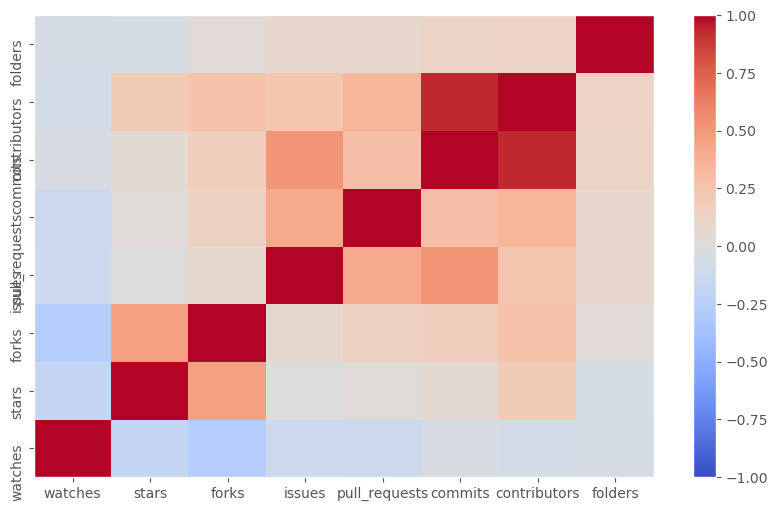

<Figure size 1000x600 with 0 Axes>

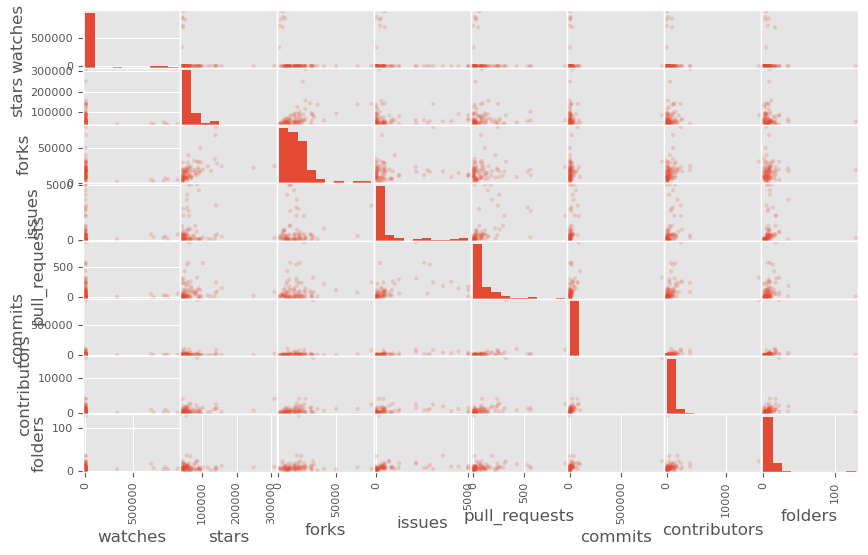

In [15]:
# overview of data with describe
print(project_info.describe())

# create color correlation matrix
# establish data frame based on all current data except name and language
corr_ma = project_info.drop(['name','language'],axis=1)
# form correlation data from correlation data frame
correlation = corr_ma.corr()
# create heat map
heat_map = plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.coolwarm)
plt.xticks(np.arange(0.5,len(correlation.index),1),correlation.index)
plt.yticks(np.arange(0.5,len(correlation.columns),1),correlation.columns,rotation='vertical')
plt.colorbar(heat_map)

# make scatterplot matrix
plt.figure()
scatter_data = project_info[['watches','stars','forks','issues','pull_requests','commits','contributors','folders']]
pd.plotting.scatter_matrix(scatter_data,alpha = 0.2)
print()
scatter_data.corr()

**Your Interpretation:** The highest coorelation seemed to come from the number of contributors and the number of commits that they had.

### 2.2. Linear regression

1. Use linear regression to try to predict the number of Stars based on Forks, Pull Requests, and Number of Folders. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. Hint: try using other variables such as Watches and/or Contributors. 

In [16]:
# get ols data of number of stars based on forks, pull req, and num of folders
stars_01_ols = sm.ols(formula="stars ~ forks + pull_requests + folders", data=project_info).fit()
stars_01_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     8.356
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           6.15e-05
Time:                        11:59:44   Log-Likelihood:                -1071.8
No. Observations:                  90   AIC:                             2152.
Df Residuals:                      86   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.913e+04   6917.005      7.102      0.000    3.54e+04    6.29e+04
forks             1.5579      0.313      4.976      0.000       0.936       2.180
pull_requests   -12.8475     26.268     -0.489      0.626     -65.066      39.371
folders        -181.0699    272.374     -0.665      0.508    -722.532     360.392
==============================================================================
Omnibus:                      108.618   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1759.406
Skew:                           3.991   Prob(JB):                         0.00
Kurtosis:                      23.136   Cond. No.                     3.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your interpretation:** 
- The R^2 value is terrible. At 0.226 it basically tells us that the data is very badly coorelated.
- The F-statistic is very low (at 8.356) it tells us that there is not a large difference between sample means.
- The p-value for forks and intercepts are basically zero while pull requests and folders are above 50%. This tells us that the pull requests and folders are likely to not be good indicators of the coorelation of the data.
- The coorelation of the intercept was extremely high, possibly too high. The forks are slightly positive which is a good indicator but doesn't help our coorelation very much. The pull requests are slightly negative, meaning it doesn't hurt our coorelation much and should likely be removed. The folders are heavy negative indicators, telling us that they should definitely be removed from our model.

In [17]:
# get ols data of number of stars based on forks, contributors, and commits
LP_ols = sm.ols(formula="stars ~ forks + contributors + commits", data=project_info).fit()
LP_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     12.55
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           7.02e-07
Time:                        11:59:44   Log-Likelihood:                -1066.9
No. Observations:                  90   AIC:                             2142.
Df Residuals:                      86   BIC:                             2152.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.191e+04   6142.371      6.822      0.000    2.97e+04    5.41e+04
forks            1.2507      0.312      4.013      0.000       0.631       1.870
contributors    19.7293      6.106      3.231      0.002       7.590      31.868
commits         -0.3447      0.110     -3.139      0.002      -0.563      -0.126
==============================================================================
Omnibus:                       76.963   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.634
Skew:                           2.693   Prob(JB):                    1.84e-127
Kurtosis:                      14.253   Cond. No.                     1.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Your interpretation:** 
- Using the model above, I was able to obtain a higher R^2 value (R^2=0.304) and find values that had p-values around zero. By using forks, contributors, and commits (the three highest values based on the coorelation heat map) we obtain a better result than the original OLS model. 
- Note: when trying to combine forks, contributors, and/or commits using multiplication I found that I could obtain a better R^2 value (about .37) but the p-value of one or more of the individual variables rose drastically (some rose to around 50-98% in some cases).